# Lateral inhibition

We create a striatal network, then place two spherical symmetric population units with radie ```r``` containing ```N_pop``` neurons each at a distance ```d``` from each other.

We stimulate the two populations first A, then B, then A and B together and investigate the firing frequency of the two populations.

In [1]:
import os
import numpy as np
network_path = "first_lateral"
snudda_data = "../../../../BasalGangliaData/data"

modified_network_file=os.path.join(network_path, "network-synapses-minimal.hdf5")
duration=5

In [2]:
from snudda import SnuddaInit

n_DSPN = 2000
n_ISPN = 2000
n_FS = 0
n_LTS = 0
n_ChIN = 0

si = SnuddaInit(network_path=network_path, snudda_data=snudda_data, random_seed=12345, honor_stay_inside=False)
si.define_striatum(num_dSPN=n_DSPN, num_iSPN=n_ISPN, num_FS=n_FS, num_LTS=n_LTS, num_ChIN=n_ChIN,
                   volume_type="cube")

# The centre of the cube is [0.00475, 0.004, 0.00775]. num_neurons is optional
si.add_population_unit_density(structure_name="Striatum", neuron_types=["dSPN", "iSPN"], 
                               unit_centre=np.array([0.00475, 0.004, 0.00775]) -np.array([0,50e-6,150e-6]),
                               probability_function="(d < 200e-6)*1", num_neurons=20)
si.add_population_unit_density(structure_name="Striatum", neuron_types=["dSPN", "iSPN"], 
                               unit_centre=np.array([0.00475, 0.004, 0.00775]) -np.array([150e-6,0,0]),
                               probability_function="(d < 200e-6) * 1", num_neurons=20)
 
si.write_json()

Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum
Adding neurons: dSPN from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/dspn
Adding neurons: iSPN from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/ispn
Writing first_lateral/network-config.json


In [3]:
from snudda import Snudda
sn = Snudda(network_path=network_path)
sn.place_neurons()

Placing neurons
Network path: first_lateral
Reading SNUDDA_DATA=../../../../BasalGangliaData/data from first_lateral/network-config.json
Generating 15184 points for first_lateral/mesh/Striatum-cube-mesh-0.0003676388257808005.obj
n_points = 14455, previous close_pairs = 24930
n_points = 13765, previous close_pairs = 20312
n_points = 13114, previous close_pairs = 16764
n_points = 12501, previous close_pairs = 13866
n_points = 11927, previous close_pairs = 11590
n_points = 11391, previous close_pairs = 9640
n_points = 10893, previous close_pairs = 8133
n_points = 10436, previous close_pairs = 6743
n_points = 10019, previous close_pairs = 5618
n_points = 9640, previous close_pairs = 4821
n_points = 9299, previous close_pairs = 4102
n_points = 8994, previous close_pairs = 3458
n_points = 8725, previous close_pairs = 2886
n_points = 8623, previous close_pairs = 2392
n_points = 6429, previous close_pairs = 2194
Filtering 6429 points..
Filtering, keeping inside points: 4957 / 6429
stop_paralle

Reading SNUDDA_DATA=../../../../BasalGangliaData/data from first_lateral/network-config.json
Population unit 0 has 3960 neurons
Population unit 1 has 20 neurons
Population unit 2 has 20 neurons
Population unit 0 has 3960 neurons
Population unit 1 has 20 neurons
Population unit 2 has 20 neurons


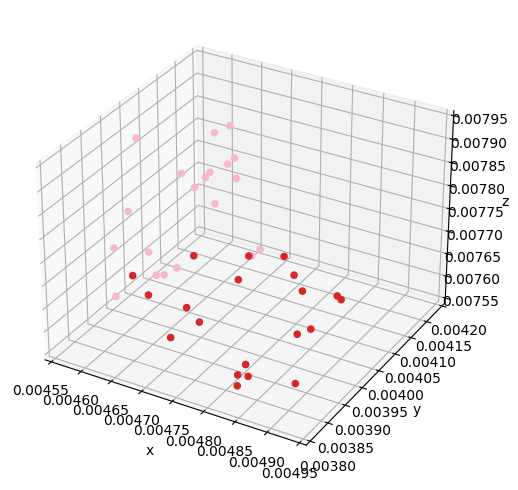

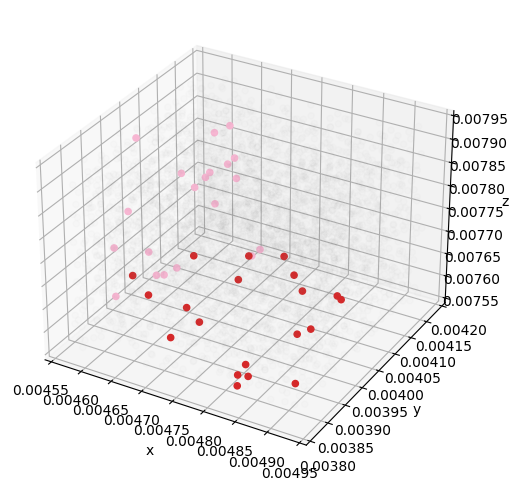

In [4]:
from snudda.plotting import PlotNetwork
pos_file = os.path.join(network_path, "network-neuron-positions.hdf5")

pn = PlotNetwork(pos_file)
pn.plot_populations(unmarked_alpha=0)
pn.plot_populations(unmarked_alpha=0.02)

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)

In [5]:
os.system("../start_ipcluster.sh")

Sleeping 20 seconds to wait for workers to start


2023-11-02 13:55:06.626 [IPClusterStart] Starting ipcluster with [daemonize=False]
2023-11-02 13:55:06.889 [IPController] Hub listening on tcp://127.0.0.1:59865 for registration.
2023-11-02 13:55:06.890 [IPController] Hub using DB backend: DictDB
2023-11-02 13:55:07.141 [IPController] hub::created hub
2023-11-02 13:55:07.141 [IPController] writing connection info to /home/hjorth/HBP/Snudda/examples/notebooks/lateral_inhitibion/.ipython/profile_default/security/ipcontroller-client.json
2023-11-02 13:55:07.141 [IPController] writing connection info to /home/hjorth/HBP/Snudda/examples/notebooks/lateral_inhitibion/.ipython/profile_default/security/ipcontroller-engine.json
2023-11-02 13:55:07.142 [IPController] task::using Python leastload Task scheduler
2023-11-02 13:55:07.153 [task] Task scheduler started [leastload]
2023-11-02 13:55:07.153 [broadcast-0] BroadcastScheduler 0 started
2023-11-02 13:55:07.154 [IPController] Heartmonitor beating every 3000ms
2023-11-02 13:55:07.154 [broadcast

2023-11-02 13:55:08.464 [IPEngine] Starting to monitor the heartbeat signal from the hub every 3500 ms.
2023-11-02 13:55:08.465 [IPEngine] Completed registration with id 3
2023-11-02 13:55:08.561 [KernelNanny.4] Starting kernel nanny for engine 4, pid=92415, nanny pid=92455
2023-11-02 13:55:08.561 [KernelNanny.4] Nanny watching parent pid 92415.
2023-11-02 13:55:08.547 [IPEngine] Loading connection info from $IPP_CONNECTION_INFO
2023-11-02 13:55:08.547 [IPEngine] WARNING | Not using CurveZMQ security
2023-11-02 13:55:08.548 [IPEngine] Registering with controller at tcp://127.0.0.1:59865
2023-11-02 13:55:08.551 [IPEngine] Shell_addrs: ['tcp://127.0.0.1:48907', 'tcp://127.0.0.1:35347', 'tcp://127.0.0.1:34867']
2023-11-02 13:55:08.551 [IPEngine] Connecting shell to tcp://127.0.0.1:48907
2023-11-02 13:55:08.551 [IPEngine] Connecting shell to tcp://127.0.0.1:35347
2023-11-02 13:55:08.551 [IPEngine] Connecting shell to tcp://127.0.0.1:34867
2023-11-02 13:55:08.551 [IPEngine] Starting nanny
2

To stop ipcluster use:   ipcluster stop


0

In [6]:
sn.touch_detection(parallel=True)

Touch detection
Network path: first_lateral
Reading IPYPARALLEL connection info from /home/hjorth/HBP/Snudda/examples/notebooks/lateral_inhitibion/.ipython/profile_default/security/ipcontroller-client.json

Reading SNUDDA_DATA=../../../../BasalGangliaData/data from first_lateral/network-config.json
importing SnuddaDetect from snudda.detect.detect on engine(s)


2023-11-02 13:55:26.457 [IPController] client::client b'\x00k\x8bEk' requested 'connection_request'
2023-11-02 13:55:26.457 [IPController] client::client [b'\x00k\x8bEk'] connected
2023-11-02 13:55:26.607 [IPEngine] Handling apply_request: bc942852-3d3b047648a373ba34e9ba1f_92255_7
2023-11-02 13:55:26.607 [IPEngine] Handling apply_request: bc942852-3d3b047648a373ba34e9ba1f_92255_5
2023-11-02 13:55:26.607 [IPEngine] Handling apply_request: bc942852-3d3b047648a373ba34e9ba1f_92255_3
2023-11-02 13:55:26.607 [IPEngine] Handling apply_request: bc942852-3d3b047648a373ba34e9ba1f_92255_4
2023-11-02 13:55:26.607 [IPEngine] Handling apply_request: bc942852-3d3b047648a373ba34e9ba1f_92255_6
2023-11-02 13:55:26.607 [IPEngine] Handling apply_request: bc942852-3d3b047648a373ba34e9ba1f_92255_1
2023-11-02 13:55:26.607 [IPEngine] Handling apply_request: bc942852-3d3b047648a373ba34e9ba1f_92255_2
2023-11-02 13:55:26.612 [IPEngine] Handling apply_request: bc942852-3d3b047648a373ba34e9ba1f_92255_8
2023-11-02 

2023-11-02 13:55:30.757 [IPController] queue::request 'bc942852-3d3b047648a373ba34e9ba1f_92255_55' completed on 6
2023-11-02 13:55:30.767 [IPController] queue::request 'bc942852-3d3b047648a373ba34e9ba1f_92255_52' completed on 3
2023-11-02 13:55:30.804 [IPController] queue::request 'bc942852-3d3b047648a373ba34e9ba1f_92255_53' completed on 4
2023-11-02 13:55:30.809 [IPController] queue::request 'bc942852-3d3b047648a373ba34e9ba1f_92255_54' completed on 5
2023-11-02 13:55:30.828 [IPController] queue::request 'bc942852-3d3b047648a373ba34e9ba1f_92255_51' completed on 2
2023-11-02 13:55:30.918 [IPController] queue::request 'bc942852-3d3b047648a373ba34e9ba1f_92255_49' completed on 0
2023-11-02 13:55:30.949 [IPController] queue::request 'bc942852-3d3b047648a373ba34e9ba1f_92255_50' completed on 1
2023-11-02 13:55:31.016 [IPEngine] Handling apply_request: bc942852-3d3b047648a373ba34e9ba1f_92255_61
2023-11-02 13:55:31.022 [IPEngine] Handling apply_request: bc942852-3d3b047648a373ba34e9ba1f_92255_6

2023-11-02 13:55:36.148 [IPController] queue::request 'bc942852-3d3b047648a373ba34e9ba1f_92255_92' completed on 3
2023-11-02 13:55:36.162 [IPController] queue::request 'bc942852-3d3b047648a373ba34e9ba1f_92255_91' completed on 2
2023-11-02 13:55:36.200 [IPController] queue::request 'bc942852-3d3b047648a373ba34e9ba1f_92255_90' completed on 1
2023-11-02 13:55:36.219 [IPController] queue::request 'bc942852-3d3b047648a373ba34e9ba1f_92255_94' completed on 5
2023-11-02 13:55:36.310 [IPController] queue::request 'bc942852-3d3b047648a373ba34e9ba1f_92255_93' completed on 4
2023-11-02 13:55:36.265 [IPEngine] WARNING | No heartbeat in the last 3500 ms (1 time(s) in a row).
2023-11-02 13:55:36.336 [IPController] queue::request 'bc942852-3d3b047648a373ba34e9ba1f_92255_95' completed on 6
2023-11-02 13:55:36.348 [IPController] queue::request 'bc942852-3d3b047648a373ba34e9ba1f_92255_96' completed on 7
2023-11-02 13:55:36.377 [IPEngine] WARNING | No heartbeat in the last 3500 ms (1 time(s) in a row).
20

importing ProjectionDetection from snudda.detect.projection_detection on engine(s)


2023-11-02 13:55:37.806 [IPEngine] Handling apply_request: bc942852-3d3b047648a373ba34e9ba1f_92255_120
2023-11-02 13:55:37.820 [IPEngine] Handling execute_request: bc942852-3d3b047648a373ba34e9ba1f_92255_128
2023-11-02 13:55:37.829 [IPEngine] Handling execute_request: bc942852-3d3b047648a373ba34e9ba1f_92255_136
2023-11-02 13:55:37.836 [IPEngine] Handling apply_request: bc942852-3d3b047648a373ba34e9ba1f_92255_144
2023-11-02 13:55:37.849 [IPEngine] Handling execute_request: bc942852-3d3b047648a373ba34e9ba1f_92255_152
2023-11-02 13:55:37.806 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'bc942852-3d3b047648a373ba34e9ba1f_92255_113' to 0
2023-11-02 13:55:37.807 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'bc942852-3d3b047648a373ba34e9ba1f_92255_114' to 1
2023-11-02 13:55:37.807 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'bc942852-3d3b047648a373ba34e9ba1f_92255_115' to 2
2023-11-02 13:55:37.807 [IPController] queue::clie

2023-11-02 13:55:38.407 [IPClusterStart] Engines appear to have started successfully


Suppressing printouts for hyper voxels that complete in < 100 seconds.


2023-11-02 13:55:53.379 [IPController] queue::request 'bc942852-3d3b047648a373ba34e9ba1f_92255_232' completed on 7
2023-11-02 13:55:53.390 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'bc942852-3d3b047648a373ba34e9ba1f_92255_233' to 7
2023-11-02 13:55:53.391 [IPController] queue::request 'bc942852-3d3b047648a373ba34e9ba1f_92255_233' completed on 7
2023-11-02 13:55:53.397 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'bc942852-3d3b047648a373ba34e9ba1f_92255_234' to 7
2023-11-02 13:55:53.399 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'bc942852-3d3b047648a373ba34e9ba1f_92255_235' to 7
2023-11-02 13:55:53.400 [IPController] queue::request 'bc942852-3d3b047648a373ba34e9ba1f_92255_234' completed on 7
2023-11-02 13:55:53.390 [IPEngine] Handling apply_request: bc942852-3d3b047648a373ba34e9ba1f_92255_233
2023-11-02 13:55:53.399 [IPEngine] Handling apply_request: bc942852-3d3b047648a373ba34e9ba1f_92255_234
2023-11-02 13:55:53.

2023-11-02 13:56:17.146 [IPController] queue::request 'bc942852-3d3b047648a373ba34e9ba1f_92255_253' completed on 7
2023-11-02 13:56:17.155 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'bc942852-3d3b047648a373ba34e9ba1f_92255_260' to 7
2023-11-02 13:56:17.158 [IPController] queue::request 'bc942852-3d3b047648a373ba34e9ba1f_92255_260' completed on 7
2023-11-02 13:56:17.161 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'bc942852-3d3b047648a373ba34e9ba1f_92255_261' to 7
2023-11-02 13:56:17.161 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'bc942852-3d3b047648a373ba34e9ba1f_92255_262' to 7
2023-11-02 13:56:17.163 [IPController] queue::request 'bc942852-3d3b047648a373ba34e9ba1f_92255_261' completed on 7
2023-11-02 13:56:17.156 [IPEngine] Handling apply_request: bc942852-3d3b047648a373ba34e9ba1f_92255_260
2023-11-02 13:56:17.161 [IPEngine] Handling apply_request: bc942852-3d3b047648a373ba34e9ba1f_92255_261
2023-11-02 13:56:17.

2023-11-02 13:56:23.262 [IPEngine] Handling apply_request: bc942852-3d3b047648a373ba34e9ba1f_92255_284
2023-11-02 13:56:23.268 [IPEngine] Handling apply_request: bc942852-3d3b047648a373ba34e9ba1f_92255_285
2023-11-02 13:56:23.270 [IPEngine] Handling execute_request: bc942852-3d3b047648a373ba34e9ba1f_92255_286
2023-11-02 13:56:23.644 [IPEngine] Handling apply_request: bc942852-3d3b047648a373ba34e9ba1f_92255_287
2023-11-02 13:56:23.632 [IPController] queue::request 'bc942852-3d3b047648a373ba34e9ba1f_92255_229' completed on 4
2023-11-02 13:56:23.643 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'bc942852-3d3b047648a373ba34e9ba1f_92255_287' to 4
2023-11-02 13:56:23.645 [IPController] queue::request 'bc942852-3d3b047648a373ba34e9ba1f_92255_287' completed on 4
2023-11-02 13:56:23.648 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'bc942852-3d3b047648a373ba34e9ba1f_92255_288' to 4
2023-11-02 13:56:23.648 [IPController] queue::client b'\x00\xf4\xb0\xd

2023-11-02 13:56:25.541 [IPEngine] Handling apply_request: bc942852-3d3b047648a373ba34e9ba1f_92255_311
2023-11-02 13:56:25.545 [IPEngine] Handling apply_request: bc942852-3d3b047648a373ba34e9ba1f_92255_312
2023-11-02 13:56:25.546 [IPEngine] Handling execute_request: bc942852-3d3b047648a373ba34e9ba1f_92255_313
2023-11-02 13:56:25.531 [IPController] queue::request 'bc942852-3d3b047648a373ba34e9ba1f_92255_301' completed on 4
2023-11-02 13:56:25.541 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'bc942852-3d3b047648a373ba34e9ba1f_92255_311' to 4
2023-11-02 13:56:25.543 [IPController] queue::request 'bc942852-3d3b047648a373ba34e9ba1f_92255_311' completed on 4
2023-11-02 13:56:25.545 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'bc942852-3d3b047648a373ba34e9ba1f_92255_312' to 4
2023-11-02 13:56:25.545 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'bc942852-3d3b047648a373ba34e9ba1f_92255_313' to 4
2023-11-02 13:56:25.546 [IPCon

2023-11-02 13:56:26.463 [IPController] queue::request 'bc942852-3d3b047648a373ba34e9ba1f_92255_228' completed on 3
2023-11-02 13:56:26.467 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'bc942852-3d3b047648a373ba34e9ba1f_92255_335' to 3
2023-11-02 13:56:26.470 [IPController] queue::request 'bc942852-3d3b047648a373ba34e9ba1f_92255_335' completed on 3
2023-11-02 13:56:26.474 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'bc942852-3d3b047648a373ba34e9ba1f_92255_336' to 3
2023-11-02 13:56:26.475 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'bc942852-3d3b047648a373ba34e9ba1f_92255_337' to 3
2023-11-02 13:56:26.476 [IPController] queue::request 'bc942852-3d3b047648a373ba34e9ba1f_92255_336' completed on 3
2023-11-02 13:56:26.468 [IPEngine] Handling apply_request: bc942852-3d3b047648a373ba34e9ba1f_92255_335
2023-11-02 13:56:26.475 [IPEngine] Handling apply_request: bc942852-3d3b047648a373ba34e9ba1f_92255_336
2023-11-02 13:56:26.

2023-11-02 13:56:27.088 [IPEngine] Handling apply_request: bc942852-3d3b047648a373ba34e9ba1f_92255_362
2023-11-02 13:56:27.092 [IPEngine] Handling apply_request: bc942852-3d3b047648a373ba34e9ba1f_92255_363
2023-11-02 13:56:27.094 [IPEngine] Handling execute_request: bc942852-3d3b047648a373ba34e9ba1f_92255_364
2023-11-02 13:56:27.059 [IPController] queue::request 'bc942852-3d3b047648a373ba34e9ba1f_92255_343' completed on 5
2023-11-02 13:56:27.061 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'bc942852-3d3b047648a373ba34e9ba1f_92255_359' to 5
2023-11-02 13:56:27.064 [IPController] queue::request 'bc942852-3d3b047648a373ba34e9ba1f_92255_359' completed on 5
2023-11-02 13:56:27.067 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'bc942852-3d3b047648a373ba34e9ba1f_92255_360' to 5
2023-11-02 13:56:27.067 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'bc942852-3d3b047648a373ba34e9ba1f_92255_361' to 5
2023-11-02 13:56:27.070 [IPCon

2023-11-02 13:56:27.608 [IPEngine] Handling apply_request: bc942852-3d3b047648a373ba34e9ba1f_92255_392
2023-11-02 13:56:27.615 [IPEngine] Handling apply_request: bc942852-3d3b047648a373ba34e9ba1f_92255_393
2023-11-02 13:56:27.619 [IPEngine] Handling execute_request: bc942852-3d3b047648a373ba34e9ba1f_92255_394
2023-11-02 13:56:27.586 [IPController] queue::request 'bc942852-3d3b047648a373ba34e9ba1f_92255_376' completed on 5
2023-11-02 13:56:27.589 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'bc942852-3d3b047648a373ba34e9ba1f_92255_389' to 5
2023-11-02 13:56:27.590 [IPController] queue::request 'bc942852-3d3b047648a373ba34e9ba1f_92255_389' completed on 5
2023-11-02 13:56:27.594 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'bc942852-3d3b047648a373ba34e9ba1f_92255_390' to 5
2023-11-02 13:56:27.594 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'bc942852-3d3b047648a373ba34e9ba1f_92255_391' to 5
2023-11-02 13:56:27.598 [IPCon

2023-11-02 13:56:28.037 [IPEngine] Handling apply_request: bc942852-3d3b047648a373ba34e9ba1f_92255_425
2023-11-02 13:56:28.043 [IPEngine] Handling apply_request: bc942852-3d3b047648a373ba34e9ba1f_92255_426
2023-11-02 13:56:28.046 [IPEngine] Handling execute_request: bc942852-3d3b047648a373ba34e9ba1f_92255_427
2023-11-02 13:56:28.077 [IPEngine] Handling apply_request: bc942852-3d3b047648a373ba34e9ba1f_92255_428
2023-11-02 13:56:28.083 [IPEngine] Handling apply_request: bc942852-3d3b047648a373ba34e9ba1f_92255_429
2023-11-02 13:56:28.087 [IPEngine] Handling execute_request: bc942852-3d3b047648a373ba34e9ba1f_92255_430
2023-11-02 13:56:28.028 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'bc942852-3d3b047648a373ba34e9ba1f_92255_422' to 4
2023-11-02 13:56:28.030 [IPController] queue::request 'bc942852-3d3b047648a373ba34e9ba1f_92255_422' completed on 4
2023-11-02 13:56:28.031 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'bc942852-3d3b047648a373ba34

2023-11-02 13:56:28.356 [IPEngine] Handling apply_request: bc942852-3d3b047648a373ba34e9ba1f_92255_449
2023-11-02 13:56:28.393 [IPEngine] Handling apply_request: bc942852-3d3b047648a373ba34e9ba1f_92255_455
2023-11-02 13:56:28.399 [IPEngine] Handling apply_request: bc942852-3d3b047648a373ba34e9ba1f_92255_456
2023-11-02 13:56:28.401 [IPEngine] Handling execute_request: bc942852-3d3b047648a373ba34e9ba1f_92255_457
2023-11-02 13:56:28.350 [IPEngine] Handling apply_request: bc942852-3d3b047648a373ba34e9ba1f_92255_446
2023-11-02 13:56:28.356 [IPEngine] Handling apply_request: bc942852-3d3b047648a373ba34e9ba1f_92255_447
2023-11-02 13:56:28.361 [IPEngine] Handling execute_request: bc942852-3d3b047648a373ba34e9ba1f_92255_448
2023-11-02 13:56:28.349 [IPController] queue::request 'bc942852-3d3b047648a373ba34e9ba1f_92255_436' completed on 5
2023-11-02 13:56:28.350 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'bc942852-3d3b047648a373ba34e9ba1f_92255_446' to 5
2023-11-02 13:56:

2023-11-02 13:56:28.740 [IPEngine] Handling apply_request: bc942852-3d3b047648a373ba34e9ba1f_92255_482
2023-11-02 13:56:28.747 [IPEngine] Handling apply_request: bc942852-3d3b047648a373ba34e9ba1f_92255_483
2023-11-02 13:56:28.749 [IPEngine] Handling execute_request: bc942852-3d3b047648a373ba34e9ba1f_92255_484
2023-11-02 13:56:28.737 [IPController] queue::request 'bc942852-3d3b047648a373ba34e9ba1f_92255_469' completed on 7
2023-11-02 13:56:28.738 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'bc942852-3d3b047648a373ba34e9ba1f_92255_482' to 7
2023-11-02 13:56:28.742 [IPController] queue::request 'bc942852-3d3b047648a373ba34e9ba1f_92255_482' completed on 7
2023-11-02 13:56:28.746 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'bc942852-3d3b047648a373ba34e9ba1f_92255_483' to 7
2023-11-02 13:56:28.746 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'bc942852-3d3b047648a373ba34e9ba1f_92255_484' to 7
2023-11-02 13:56:28.749 [IPCon

HyperID 86 completed - 16836354 synapses found (170.7 s)
Reading SNUDDA_DATA=../../../../BasalGangliaData/data from first_lateral/network-config.json


2023-11-02 13:58:28.672 [IPEngine] Handling apply_request: bc942852-3d3b047648a373ba34e9ba1f_92255_499
2023-11-02 13:58:28.683 [IPEngine] Handling apply_request: bc942852-3d3b047648a373ba34e9ba1f_92255_500
2023-11-02 13:58:28.661 [IPController] queue::request 'bc942852-3d3b047648a373ba34e9ba1f_92255_225' completed on 0
2023-11-02 13:58:28.672 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'bc942852-3d3b047648a373ba34e9ba1f_92255_499' to 0
2023-11-02 13:58:28.675 [IPController] queue::request 'bc942852-3d3b047648a373ba34e9ba1f_92255_499' completed on 0
2023-11-02 13:58:28.683 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'bc942852-3d3b047648a373ba34e9ba1f_92255_500' to 0
2023-11-02 13:58:28.687 [IPController] queue::request 'bc942852-3d3b047648a373ba34e9ba1f_92255_500' completed on 0
2023-11-02 13:58:28.827 [IPEngine] Handling execute_request: bc942852-3d3b047648a373ba34e9ba1f_92255_504
2023-11-02 13:58:28.828 [IPEngine] Handling execute_reques

stop_parallel disabled, to keep pool running.

Program run time: 204.2s


2023-11-02 13:58:29.368 [IPController] queue::request 'bc942852-3d3b047648a373ba34e9ba1f_92255_501' completed on 0


(<snudda.detect.detect.SnuddaDetect at 0xffff329e6100>,
 <snudda.detect.project.SnuddaProject at 0xffff205572e0>)

In [7]:
sn.prune_synapses(parallel=True)

2023-11-02 13:58:29.422 [IPController] queue::request 'bc942852-3d3b047648a373ba34e9ba1f_92255_502' completed on 1
2023-11-02 13:58:29.463 [IPController] queue::request 'bc942852-3d3b047648a373ba34e9ba1f_92255_503' completed on 2
2023-11-02 13:58:29.484 [IPController] client::client b'\x00k\x8bEl' requested 'connection_request'
2023-11-02 13:58:29.484 [IPController] client::client [b'\x00k\x8bEl'] connected


Prune synapses
Network path: first_lateral
Reading IPYPARALLEL connection info from /home/hjorth/HBP/Snudda/examples/notebooks/lateral_inhitibion/.ipython/profile_default/security/ipcontroller-client.json

No file first_lateral/pruning_merge_info.json
importing SnuddaPrune from snudda.detect.prune on engine(s)


2023-11-02 13:58:29.632 [IPEngine] Handling apply_request: 8f946a50-97e6289781e6940d8ceb17de_92255_4
2023-11-02 13:58:29.633 [IPEngine] Handling apply_request: 8f946a50-97e6289781e6940d8ceb17de_92255_8
2023-11-02 13:58:29.647 [IPEngine] Handling apply_request: 8f946a50-97e6289781e6940d8ceb17de_92255_16
2023-11-02 13:58:29.657 [IPEngine] Handling apply_request: 8f946a50-97e6289781e6940d8ceb17de_92255_24
2023-11-02 13:58:29.665 [IPEngine] Handling execute_request: 8f946a50-97e6289781e6940d8ceb17de_92255_32
2023-11-02 13:58:29.640 [IPEngine] Handling apply_request: 8f946a50-97e6289781e6940d8ceb17de_92255_1
2023-11-02 13:58:29.647 [IPEngine] Handling apply_request: 8f946a50-97e6289781e6940d8ceb17de_92255_9
2023-11-02 13:58:29.657 [IPEngine] Handling apply_request: 8f946a50-97e6289781e6940d8ceb17de_92255_17
2023-11-02 13:58:29.663 [IPEngine] Handling execute_request: 8f946a50-97e6289781e6940d8ceb17de_92255_25
2023-11-02 13:58:29.632 [IPEngine] Handling apply_request: 8f946a50-97e6289781e694

2023-11-02 13:58:29.632 [IPEngine] Handling apply_request: 8f946a50-97e6289781e6940d8ceb17de_92255_5
2023-11-02 13:58:29.648 [IPEngine] Handling apply_request: 8f946a50-97e6289781e6940d8ceb17de_92255_13
2023-11-02 13:58:29.657 [IPEngine] Handling apply_request: 8f946a50-97e6289781e6940d8ceb17de_92255_21
2023-11-02 13:58:29.664 [IPEngine] Handling execute_request: 8f946a50-97e6289781e6940d8ceb17de_92255_29
2023-11-02 13:58:29.636 [IPEngine] Handling apply_request: 8f946a50-97e6289781e6940d8ceb17de_92255_2
2023-11-02 13:58:29.649 [IPEngine] Handling apply_request: 8f946a50-97e6289781e6940d8ceb17de_92255_10
2023-11-02 13:58:29.656 [IPEngine] Handling apply_request: 8f946a50-97e6289781e6940d8ceb17de_92255_18
2023-11-02 13:58:29.664 [IPEngine] Handling execute_request: 8f946a50-97e6289781e6940d8ceb17de_92255_26
2023-11-02 13:58:29.634 [IPEngine] Handling apply_request: 8f946a50-97e6289781e6940d8ceb17de_92255_6
2023-11-02 13:58:29.648 [IPEngine] Handling apply_request: 8f946a50-97e6289781e69

2023-11-02 13:58:46.566 [IPController] queue::request '8f946a50-97e6289781e6940d8ceb17de_92255_44' completed on 3
2023-11-02 13:58:46.737 [IPController] queue::request '8f946a50-97e6289781e6940d8ceb17de_92255_41' completed on 0
2023-11-02 13:58:47.371 [IPEngine] Handling apply_request: 8f946a50-97e6289781e6940d8ceb17de_92255_54
2023-11-02 13:58:47.383 [IPEngine] Handling execute_request: 8f946a50-97e6289781e6940d8ceb17de_92255_62
2023-11-02 13:58:47.372 [IPEngine] Handling apply_request: 8f946a50-97e6289781e6940d8ceb17de_92255_52
2023-11-02 13:58:47.383 [IPEngine] Handling execute_request: 8f946a50-97e6289781e6940d8ceb17de_92255_60
2023-11-02 13:58:47.368 [IPController] queue::request '8f946a50-97e6289781e6940d8ceb17de_92255_42' completed on 1
2023-11-02 13:58:47.370 [IPController] queue::client b'\x00\xf4\xb0\xdcR' submitted request '8f946a50-97e6289781e6940d8ceb17de_92255_49' to 0
2023-11-02 13:58:47.371 [IPController] queue::client b'\x00\xf4\xb0\xdcR' submitted request '8f946a50-97

2023-11-02 13:59:13.762 [IPController] queue::request '8f946a50-97e6289781e6940d8ceb17de_92255_104' completed on 7
2023-11-02 13:59:13.884 [IPEngine] WARNING | No heartbeat in the last 3500 ms (1 time(s) in a row).
2023-11-02 13:59:21.073 [IPController] queue::request '8f946a50-97e6289781e6940d8ceb17de_92255_97' completed on 0
2023-11-02 13:59:21.778 [IPController] queue::request '8f946a50-97e6289781e6940d8ceb17de_92255_103' completed on 6
2023-11-02 13:59:21.813 [IPController] queue::request '8f946a50-97e6289781e6940d8ceb17de_92255_102' completed on 5
2023-11-02 13:59:22.147 [IPController] queue::request '8f946a50-97e6289781e6940d8ceb17de_92255_101' completed on 4
2023-11-02 13:59:24.455 [IPController] queue::request '8f946a50-97e6289781e6940d8ceb17de_92255_98' completed on 1
2023-11-02 13:59:24.938 [IPController] queue::request '8f946a50-97e6289781e6940d8ceb17de_92255_100' completed on 3
2023-11-02 13:59:25.133 [IPEngine] Handling apply_request: 8f946a50-97e6289781e6940d8ceb17de_9225

prune_synapses_parallel (2169156/41715509 synapses, 5.2% kept): 37.5s
prune_synapses_parallel (0/0 gapJunctions, 0.0% kept): 0.0s


2023-11-02 13:59:25.491 [IPEngine] Handling apply_request: 8f946a50-97e6289781e6940d8ceb17de_92255_126
2023-11-02 13:59:25.492 [IPEngine] Handling apply_request: 8f946a50-97e6289781e6940d8ceb17de_92255_124
2023-11-02 13:59:25.502 [IPEngine] Handling apply_request: 8f946a50-97e6289781e6940d8ceb17de_92255_132
2023-11-02 13:59:25.491 [IPEngine] Handling apply_request: 8f946a50-97e6289781e6940d8ceb17de_92255_121
2023-11-02 13:59:25.502 [IPEngine] Handling apply_request: 8f946a50-97e6289781e6940d8ceb17de_92255_129
2023-11-02 13:59:25.509 [IPEngine] Handling apply_request: 8f946a50-97e6289781e6940d8ceb17de_92255_137
2023-11-02 13:59:25.517 [IPEngine] Handling execute_request: 8f946a50-97e6289781e6940d8ceb17de_92255_145
2023-11-02 13:59:25.526 [IPEngine] Handling apply_request: 8f946a50-97e6289781e6940d8ceb17de_92255_153
2023-11-02 13:59:25.533 [IPEngine] Handling apply_request: 8f946a50-97e6289781e6940d8ceb17de_92255_161
2023-11-02 13:59:25.491 [IPEngine] Handling apply_request: 8f946a50-97e

stop_parallel disabled, to keep pool running.

Program run time: 260.6s


2023-11-02 13:59:25.678 [IPEngine] Handling execute_request: 8f946a50-97e6289781e6940d8ceb17de_92255_176
2023-11-02 13:59:25.678 [IPEngine] Handling execute_request: 8f946a50-97e6289781e6940d8ceb17de_92255_169
2023-11-02 13:59:25.678 [IPEngine] Handling execute_request: 8f946a50-97e6289781e6940d8ceb17de_92255_170
2023-11-02 13:59:25.678 [IPEngine] Handling execute_request: 8f946a50-97e6289781e6940d8ceb17de_92255_175
2023-11-02 13:59:25.678 [IPEngine] Handling execute_request: 8f946a50-97e6289781e6940d8ceb17de_92255_171
2023-11-02 13:59:25.679 [IPController] queue::client b'\x00\xf4\xb0\xdcR' submitted request '8f946a50-97e6289781e6940d8ceb17de_92255_169' to 0
2023-11-02 13:59:25.679 [IPController] queue::client b'\x00\xf4\xb0\xdcR' submitted request '8f946a50-97e6289781e6940d8ceb17de_92255_170' to 1
2023-11-02 13:59:25.679 [IPController] queue::client b'\x00\xf4\xb0\xdcR' submitted request '8f946a50-97e6289781e6940d8ceb17de_92255_171' to 2
2023-11-02 13:59:25.680 [IPController] queue::

# Reduce network

We have three options.

-- Keep all neurons

-- __Keep only the population unit neurons (We do this here)__

-- Keep only population unit neurons and all neurons connecting to them

In [8]:
from snudda.utils.ablate_network import SnuddaAblateNetwork

ab = SnuddaAblateNetwork(network_file=network_path)
pop_unit_1 = ab.snudda_load.get_population_unit_members(population_unit=1)
pop_unit_2 = ab.snudda_load.get_population_unit_members(population_unit=2)
ab.only_keep_neuron_id(neuron_id=set(pop_unit_1).union(set(pop_unit_2)))
ab.write_network(out_file_name=modified_network_file)

2023-11-02 13:59:25.706 [IPEngine] Handling execute_request: 8f946a50-97e6289781e6940d8ceb17de_92255_172
2023-11-02 13:59:25.781 [IPController] queue::request '8f946a50-97e6289781e6940d8ceb17de_92255_176' completed on 7
2023-11-02 13:59:25.783 [IPController] queue::request '8f946a50-97e6289781e6940d8ceb17de_92255_173' completed on 4
2023-11-02 13:59:25.786 [IPController] queue::request '8f946a50-97e6289781e6940d8ceb17de_92255_172' completed on 3


Writing to first_lateral/network-synapses-minimal.hdf5
Copying morphologies
Keeping 40 neurons.
0/2169156 synapses processed
2169156/2169156 synapses processed
Filtering done.
Copying synapses and gap junctions
230 / 230 synapse rows parsed
Synapse matrix written.
Keeping 230 synapses (out of 2169156)
0 / 0 gap junction rows parsed
Gap junction matrix written.
Keeping 0  gap junctions (out of 0)


Reading SNUDDA_DATA=../../../../BasalGangliaData/data from first_lateral/network-config.json
Population unit 1 has 20 neurons
Population unit 2 has 20 neurons
Population unit 1 has 20 neurons
Population unit 2 has 20 neurons


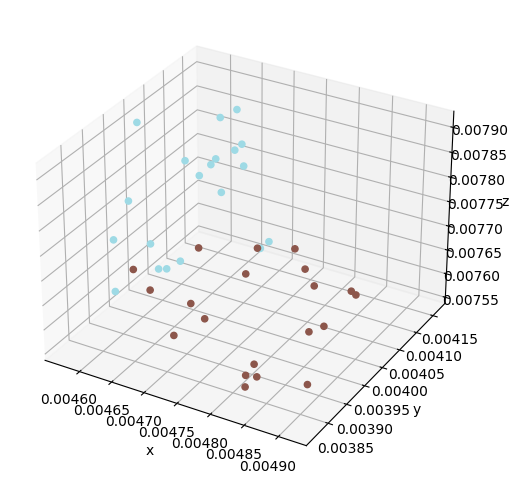

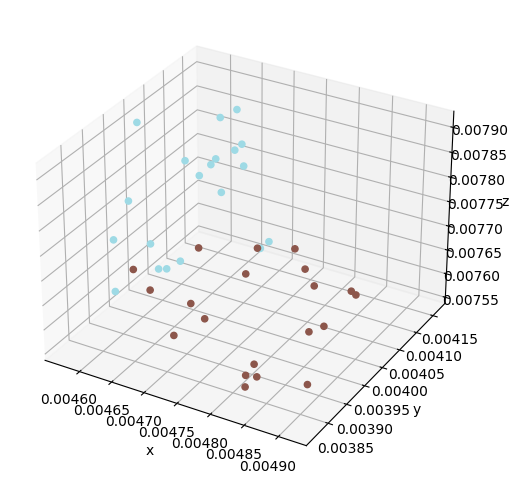

In [9]:
from snudda.plotting import PlotNetwork

pn2 = PlotNetwork(modified_network_file)
pn2.plot_populations(unmarked_alpha=0)
pn2.plot_populations(unmarked_alpha=0.02)

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn2.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)

In [10]:
sn.setup_input(network_file=modified_network_file, input_config="input.json", input_time=duration, parallel=True)

Setting up inputs, assuming input.json exists
Reading IPYPARALLEL connection info from /home/hjorth/HBP/Snudda/examples/notebooks/lateral_inhitibion/.ipython/profile_default/security/ipcontroller-client.json

Reading SNUDDA_DATA=../../../../BasalGangliaData/data from first_lateral/network-config.json
Writing input spikes to first_lateral/input-spikes.hdf5
Reading SNUDDA_DATA=../../../../BasalGangliaData/data from first_lateral/network-config.json
importing SnuddaInput from snudda.input.input on engine(s)


2023-11-02 13:59:27.158 [IPController] client::client b'\x00k\x8bEm' requested 'connection_request'
2023-11-02 13:59:27.158 [IPController] client::client [b'\x00k\x8bEm'] connected
2023-11-02 13:59:27.189 [IPEngine] Handling apply_request: 700403e6-13a97fa9d13ad8ad088a714e_92255_6
2023-11-02 13:59:27.202 [IPEngine] Handling apply_request: 700403e6-13a97fa9d13ad8ad088a714e_92255_14
2023-11-02 13:59:27.205 [IPEngine] Handling apply_request: 700403e6-13a97fa9d13ad8ad088a714e_92255_22
2023-11-02 13:59:27.188 [IPEngine] Handling apply_request: 700403e6-13a97fa9d13ad8ad088a714e_92255_4
2023-11-02 13:59:27.202 [IPEngine] Handling apply_request: 700403e6-13a97fa9d13ad8ad088a714e_92255_12
2023-11-02 13:59:27.205 [IPEngine] Handling apply_request: 700403e6-13a97fa9d13ad8ad088a714e_92255_20
2023-11-02 13:59:27.217 [IPEngine] Handling execute_request: 700403e6-13a97fa9d13ad8ad088a714e_92255_28
2023-11-02 13:59:27.188 [IPEngine] Handling apply_request: 700403e6-13a97fa9d13ad8ad088a714e_92255_7
2023

Writing spikes to first_lateral/input-spikes.hdf5


2023-11-02 13:59:27.482 [IPEngine] Handling execute_request: 700403e6-13a97fa9d13ad8ad088a714e_92255_63
2023-11-02 13:59:27.482 [IPEngine] Handling execute_request: 700403e6-13a97fa9d13ad8ad088a714e_92255_64
2023-11-02 13:59:27.485 [IPEngine] Handling apply_request: 700403e6-13a97fa9d13ad8ad088a714e_92255_72
2023-11-02 13:59:27.482 [IPEngine] Handling execute_request: 700403e6-13a97fa9d13ad8ad088a714e_92255_61
2023-11-02 13:59:27.484 [IPEngine] Handling execute_request: 700403e6-13a97fa9d13ad8ad088a714e_92255_59
2023-11-02 13:59:27.486 [IPEngine] Handling apply_request: 700403e6-13a97fa9d13ad8ad088a714e_92255_67
2023-11-02 13:59:27.482 [IPEngine] Handling execute_request: 700403e6-13a97fa9d13ad8ad088a714e_92255_57
2023-11-02 13:59:27.484 [IPEngine] Handling apply_request: 700403e6-13a97fa9d13ad8ad088a714e_92255_65
2023-11-02 13:59:27.421 [IPController] queue::request '700403e6-13a97fa9d13ad8ad088a714e_92255_51' completed on 2
2023-11-02 13:59:27.442 [IPController] queue::request '70040

stop_parallel disabled, to keep pool running.

Program run time: 262.6s


2023-11-02 13:59:27.734 [IPEngine] Handling execute_request: 700403e6-13a97fa9d13ad8ad088a714e_92255_80
2023-11-02 13:59:27.733 [IPEngine] Handling execute_request: 700403e6-13a97fa9d13ad8ad088a714e_92255_77
2023-11-02 13:59:27.733 [IPEngine] Handling execute_request: 700403e6-13a97fa9d13ad8ad088a714e_92255_79
2023-11-02 13:59:27.732 [IPEngine] Handling execute_request: 700403e6-13a97fa9d13ad8ad088a714e_92255_73
2023-11-02 13:59:27.733 [IPEngine] Handling execute_request: 700403e6-13a97fa9d13ad8ad088a714e_92255_74
2023-11-02 13:59:27.732 [IPController] queue::client b'\x00\xf4\xb0\xdcS' submitted request '700403e6-13a97fa9d13ad8ad088a714e_92255_73' to 0
2023-11-02 13:59:27.733 [IPController] queue::client b'\x00\xf4\xb0\xdcS' submitted request '700403e6-13a97fa9d13ad8ad088a714e_92255_74' to 1
2023-11-02 13:59:27.733 [IPController] queue::client b'\x00\xf4\xb0\xdcS' submitted request '700403e6-13a97fa9d13ad8ad088a714e_92255_75' to 2
2023-11-02 13:59:27.733 [IPController] queue::client b

In [11]:
os.system('export IPYTHONDIR="`pwd`/.ipython" && ipcluster stop')

2023-11-02 13:59:27.822 [IPController] queue::request '700403e6-13a97fa9d13ad8ad088a714e_92255_75' completed on 2
2023-11-02 13:59:27.822 [IPController] queue::request '700403e6-13a97fa9d13ad8ad088a714e_92255_74' completed on 1
2023-11-02 13:59:27.823 [IPController] queue::request '700403e6-13a97fa9d13ad8ad088a714e_92255_73' completed on 0
2023-11-02 13:59:27.824 [IPController] queue::request '700403e6-13a97fa9d13ad8ad088a714e_92255_79' completed on 6
2023-11-02 13:59:27.824 [IPController] queue::request '700403e6-13a97fa9d13ad8ad088a714e_92255_76' completed on 3
2023-11-02 13:59:27.825 [IPController] queue::request '700403e6-13a97fa9d13ad8ad088a714e_92255_80' completed on 7
2023-11-02 13:59:27.827 [IPController] queue::request '700403e6-13a97fa9d13ad8ad088a714e_92255_77' completed on 4
2023-11-02 13:59:27.827 [IPController] queue::request '700403e6-13a97fa9d13ad8ad088a714e_92255_78' completed on 5
2023-11-02 13:59:28.282 [IPClusterStop] Stopping cluster 
2023-11-02 13:59:28.283 [IPClu

0

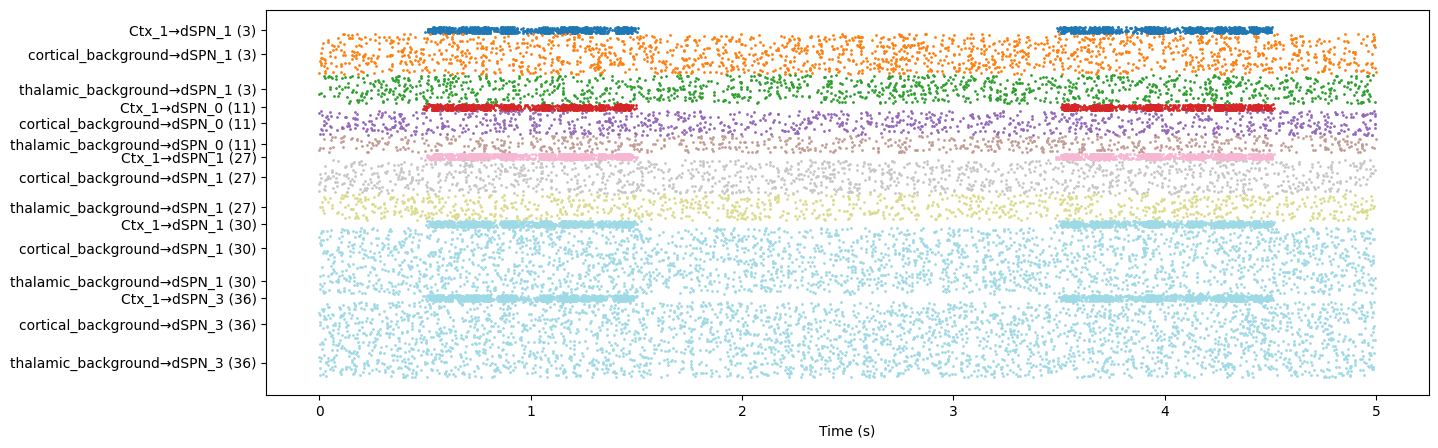

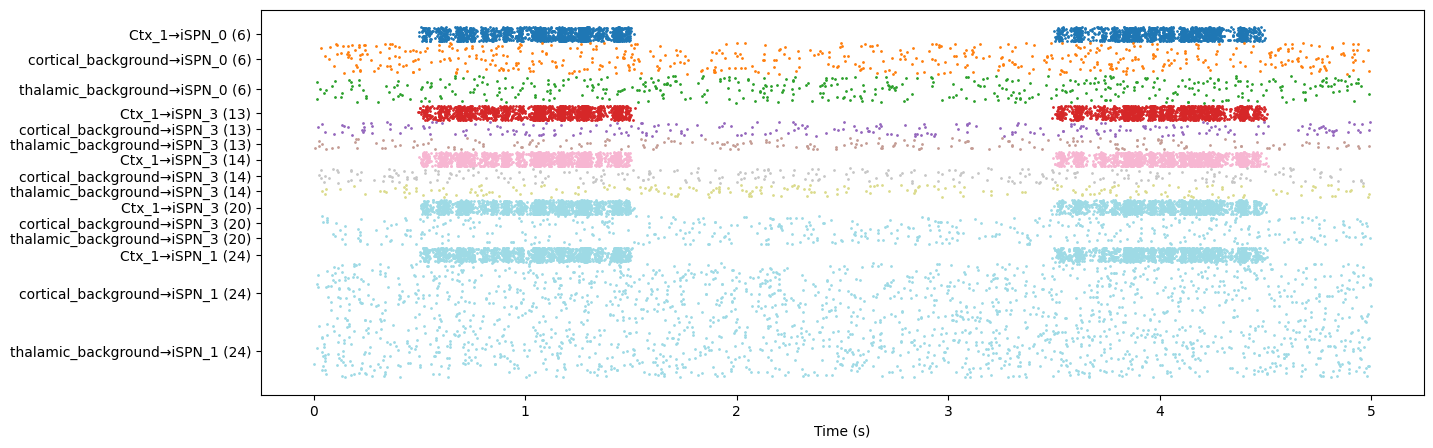

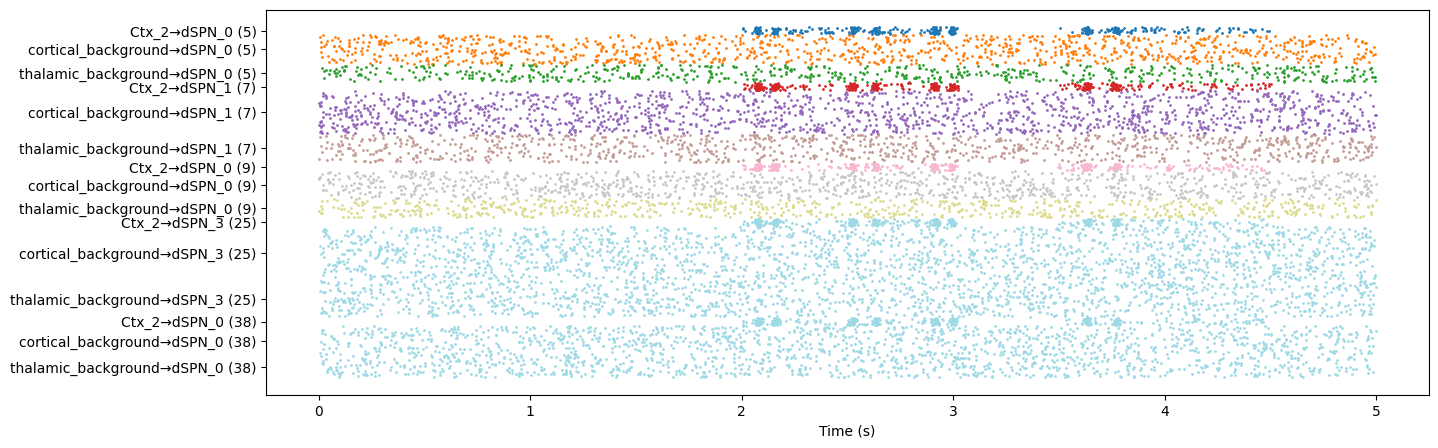

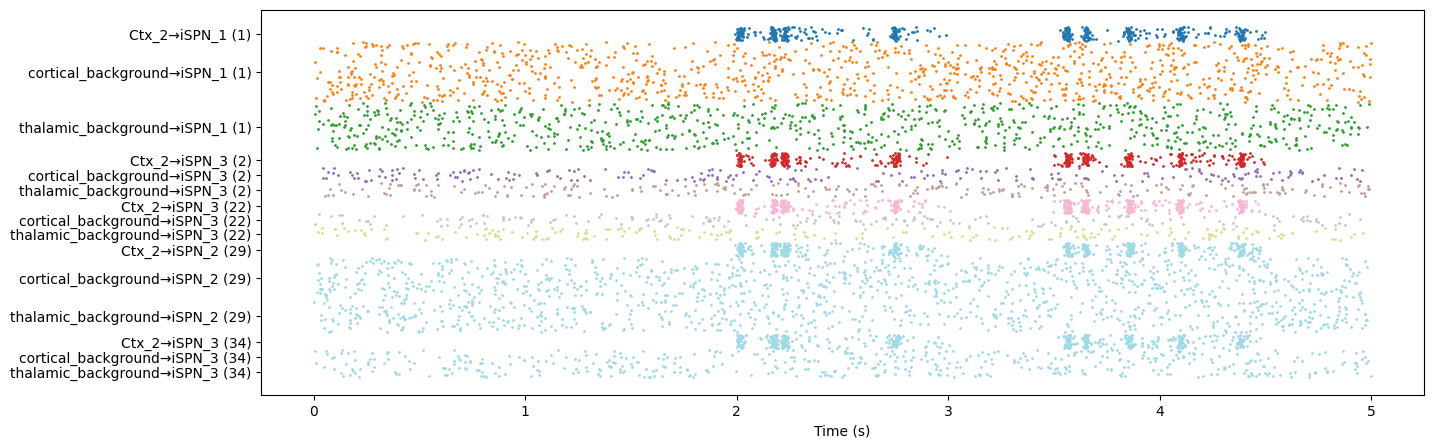

In [12]:
from snudda.plotting import PlotInput
input_file = os.path.join(network_path, "input-spikes.hdf5")
spi = PlotInput(input_file, modified_network_file)
spi.plot_input_population_unit(population_unit_id=1, num_neurons=5, neuron_type="dSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=1, num_neurons=5, neuron_type="iSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=2, num_neurons=5, neuron_type="dSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=2, num_neurons=5, neuron_type="iSPN", fig_size=(15,5))

In [13]:
n_cores=8
os.system(f"mpiexec -n {n_cores} snudda simulate {network_path} --networkFile {modified_network_file} --time {duration}")

args.ipython_profile = None
args.ipython_profile = None
args.ipython_profile = None
args.ipython_profile = None
args.ipython_profile = None
args.ipython_profile = None
args.ipython_profile = None
args.ipython_profile = None
numprocs=8
args: Namespace(action='simulate', path='first_lateral', network_file='first_lateral/network-synapses-minimal.hdf5', input_file=None, output_file=None, time=5.0, snudda_data=None, record_volt=True, randomseed=None, neuromodulation=None, disable_synapses=False, disable_gj=False, mech_dir=None, profile=False, verbose=False, exportCoreNeuron=False, record_all=None, ipython_profile=None)
args: Namespace(action='simulate', path='first_lateral', network_file='first_lateral/network-synapses-minimal.hdf5', input_file=None, output_file=None, time=5.0, snudda_data=None, record_volt=True, randomseed=None, neuromodulation=None, disable_synapses=False, disable_gj=False, mech_dir=None, profile=False, verbose=False, exportCoreNeuron=False, record_all=None, ipython_profi

1% done. Elapsed: 2.7 s, estimated time left: 265.1 s
37% done. Elapsed: 105.1 s, estimated time left: 179.0 s
64% done. Elapsed: 205.7 s, estimated time left: 115.7 s
96% done. Elapsed: 308.4 s, estimated time left: 12.9 s
Neuron simulation finished
Neuron simulation finished
Neuron simulation finished
Neuron simulation finished
Neuron simulation finished
Neuron simulation finished
Neuron simulation finished
Neuron simulation finished
Simulation run time: 321.1 s
Simulation done, saving output
Simulation run time: 321.1 s
Simulation done, saving output
Simulation run time: 321.0 s
Simulation done, saving output
Simulation run time: 321.0 s
Simulation run time: 320.9 s
Simulation done, saving output
Simulation run time: 320.9 s
Simulation done, saving output
Simulation run time: 321.1 s
Simulation done, saving output
Simulation run time: 321.0 s
Simulation done, saving output
Simulation done, saving output
Writing network output to first_lateral/simulation/output.hdf5
Using sample dt =

0

Loading first_lateral/simulation/output.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
10: (dSPN_2, pb267a31a, mf0350288)
11: (dSPN_0, pd01ac450, m37886c78)
Saving figure to first_lateral/figures/spike-raster.png


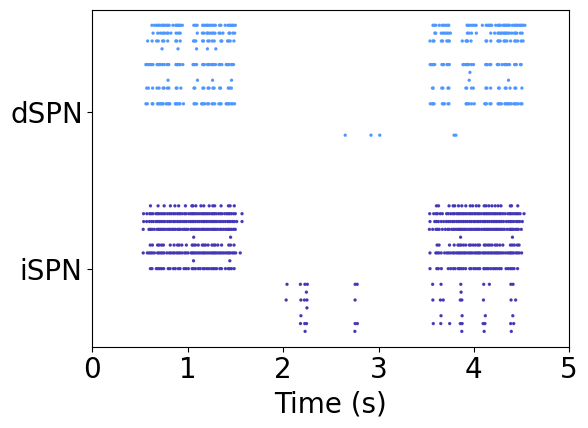

In [14]:
from snudda.plotting import SnuddaPlotSpikeRaster2
fig_file_raster = f"spike-raster.png"

time_range_zoom = (0,duration)
spr = SnuddaPlotSpikeRaster2(network_path=network_path,
                             network_file=modified_network_file)

spr.plot_spike_raster(fig_file=fig_file_raster, time_range=time_range_zoom)

Saving figure first_lateral/figures/spike-frequency-pop-units1-2.pdf


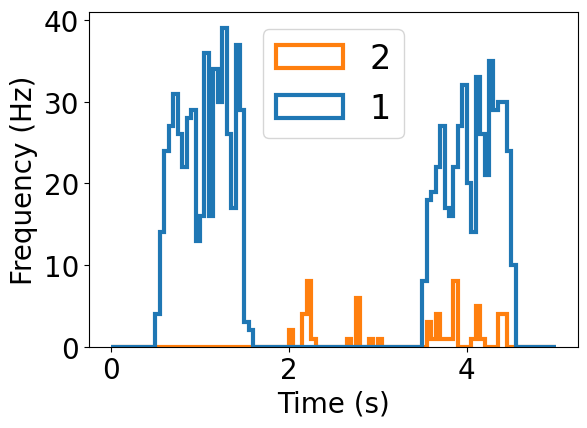

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [15]:
spr.plot_spike_histogram()